<a href="https://colab.research.google.com/github/marioTavFer/DIO-MLS/blob/main/DIO_MD04_CopiaConfusionMatrix_MLTF_V3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modulo 04 - Desafio de Projeto - Calculo de Metricas de avaliacao de Aprendizado - Utilizando o exemplo do professor, calcular as principais metricas para avaliacao de modelos de classificacao de dados, como acuracia, sensibilidade (recall), especificidade, precisão e F-score.

In [1]:
# Objetivo do exercício é o calculo manual dos valore VP, VN, FP, FN da matriz de confusão, utilizando o exemplo fornecido pelo professor.
# Análise se inicia após heatmap

# !pip install -q tensorflow-gpu==2.0.0-beta1

In [2]:
import io
import keras
from keras import datasets, layers, models
import matplotlib as mat
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
print('keras: ', keras.__version__, '\nmatplolib: ', mat.__version__, '\ntensorflow: ', tf.__version__, '\nnumpy: ',np.__version__, '\nseaborn: ', sns.__version__, '\npandas: ', pd.__version__)

keras:  3.4.1 
matplolib:  3.8.0 
tensorflow:  2.17.0 
numpy:  1.26.4 
seaborn:  0.13.2 
pandas:  2.2.2


In [4]:
%load_ext tensorboard

In [5]:
logdir='logv3'

In [6]:
(treino_imagens, treino_labels), (teste_imagens, teste_labels) = datasets.mnist.load_data()

treino_imagens = treino_imagens.reshape((60000, 28, 28, 1))
teste_imagens = teste_imagens.reshape((10000, 28, 28, 1))

treino_imagens, teste_imagens = treino_imagens / 255.0, teste_imagens / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
model = models.Sequential()
model.add(keras.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [8]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=treino_imagens,
            y=treino_labels,
            epochs=5,
            validation_data=(teste_imagens, teste_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.8929 - loss: 0.3485 - val_accuracy: 0.9840 - val_loss: 0.0514
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 32ms/step - accuracy: 0.9848 - loss: 0.0502 - val_accuracy: 0.9875 - val_loss: 0.0357
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9900 - loss: 0.0337 - val_accuracy: 0.9867 - val_loss: 0.0412
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9917 - loss: 0.0266 - val_accuracy: 0.9909 - val_loss: 0.0307
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9935 - loss: 0.0190 - val_accuracy: 0.9899 - val_loss: 0.0357


In [10]:
y_teste=teste_labels
#y_prev=model.predict_classes(teste_imagens)
y_previsto=np.argmax(model.predict(teste_imagens), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [11]:
type(y_teste)

numpy.ndarray

In [12]:
classes=[0,1,2,3,4,5,6,7,8,9]

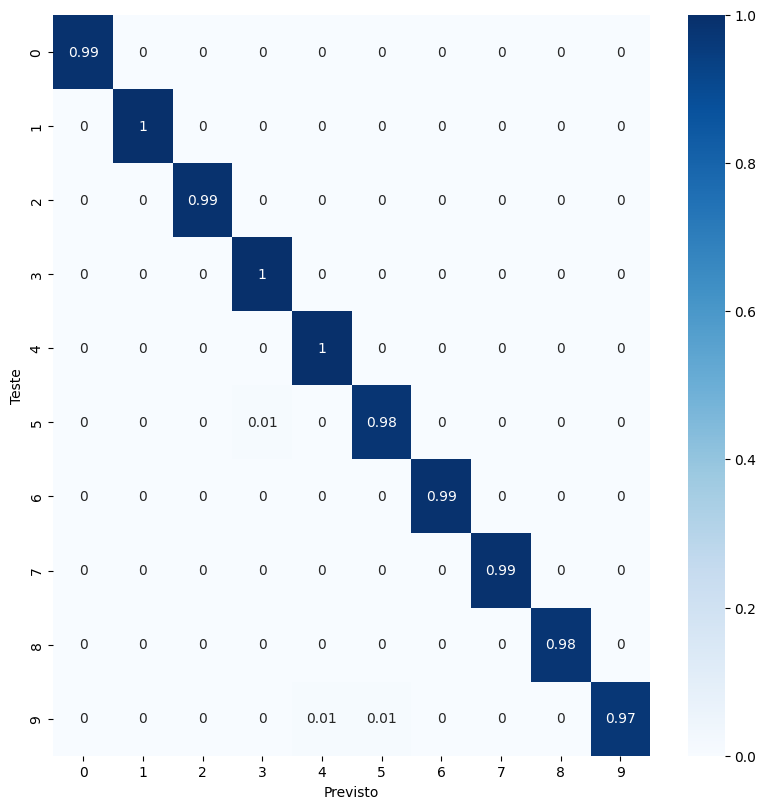

In [13]:
con_mat = tf.math.confusion_matrix(
    labels=y_teste,
    predictions=y_previsto).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('Teste')
plt.xlabel('Previsto')
plt.show()

In [14]:
avaliacao = model.evaluate(teste_imagens, y_previsto)
print(avaliacao)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 1.0000 - loss: 0.0088
[0.006942663341760635, 1.0]


In [15]:
# Sumário do Modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

In [16]:
# Conferindo (A) quantas imagens por classe
zero, um, dois, tres, quatro, cinco, seis, sete, oito, nove, erro = 0,0,0,0,0,0,0,0,0,0,0
for i in range(0,teste_labels.size):
  if teste_labels[i]== 0:
    zero = zero + 1
  elif teste_labels[i]== 1:
    um = um + 1
  elif teste_labels[i]== 2:
    dois = dois + 1
  elif teste_labels[i]== 3:
    tres = tres + 1
  elif teste_labels[i]== 4:
    quatro = quatro + 1
  elif teste_labels[i]== 5:
    cinco = cinco + 1
  elif teste_labels[i]== 6:
    seis = seis + 1
  elif teste_labels[i]== 7:
    sete = sete + 1
  elif teste_labels[i]== 8:
    oito = oito + 1
  elif teste_labels[i]== 9:
    nove = nove + 1
  else:
    erro = erro + 1

print(zero, um, dois, tres, quatro, cinco, seis, sete, oito, nove, erro)
soma = zero + um + dois + tres + quatro + cinco + seis + sete + oito + nove + erro
print('\nTotal: ', soma)

980 1135 1032 1010 982 892 958 1028 974 1009 0

Total:  10000


In [17]:
# conferindo arquivo de imagens
print(type(teste_imagens))
print(teste_imagens.ndim)
print(teste_imagens.shape)
print(teste_imagens.dtype)

<class 'numpy.ndarray'>
4
(10000, 28, 28, 1)
float64


In [18]:
# Matriz (B) da confusion matrix
con_mat

array([[ 975,    0,    0,    0,    0,    0,    4,    1,    0,    0],
       [   0, 1134,    0,    1,    0,    0,    0,    0,    0,    0],
       [   1,    2, 1018,    1,    3,    0,    3,    4,    0,    0],
       [   0,    0,    0, 1009,    0,    0,    0,    1,    0,    0],
       [   0,    0,    0,    0,  978,    0,    2,    0,    0,    2],
       [   0,    0,    0,   11,    0,  877,    3,    1,    0,    0],
       [   2,    4,    0,    0,    1,    0,  951,    0,    0,    0],
       [   0,    4,    3,    0,    0,    0,    0, 1018,    0,    3],
       [   2,    2,    3,    1,    1,    1,    2,    2,  958,    2],
       [   1,    1,    0,    2,    7,   10,    0,    2,    5,  981]],
      dtype=int32)

In [19]:
# numero de imagens por classe
num_imagens = [zero, um, dois, tres, quatro, cinco, seis, sete, oito, nove]
num_imagens

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]

In [20]:
#calculo de VP, VN, de uma classe [REFAZER MENOS LINHA E COLUNA, PARA CIMA]
def calculo_VP_VN (classe_num):
  VP,VN, MT = 0,0,0
  linha, coluna = 0,0

  # VP - verdadeiro positivo da classe
  VP = con_mat[classe_num,classe_num]

  # VN - verdadeiro negativo
  # 1) soma a matriz inteira
  # 2) e diminui a linha e coluna da classe analisada

  #1)
  for i in range(0, 10):
    for j in range(0, 10):
      MT = MT + con_mat[j,i]

  #2)
  for i in range(0, 10):
    coluna += con_mat[i,classe_num]
    linha += con_mat[classe_num,i]

  # diminuindo VP porque foi somado 2x
  VN = MT - (linha + coluna - VP)

  return VP, VN

In [21]:
# Calculo de FP e FN de uma classe

def calculo_FP_FN (classe_num):
  VP, FP,FN = 0,0,0
  VP = con_mat[classe_num,classe_num]
  # FP - soma a coluna; FN - soma a Linha (menos VP)
  for i in range(0, 10):
    FP += con_mat[i,classe_num]
    FN += con_mat[classe_num,i]
  FP = FP - VP
  FN = FN - VP

  return FP, FN

In [22]:
#definir a classe para analisar
classe_analisada = 9

N = 10000
VP,VN, FP,FN = 0,0,0,0
VP, VN = calculo_VP_VN(classe_analisada)
FP, FN = calculo_FP_FN(classe_analisada)

print ('Número de Amostras: ', N, '\nVerdadeiro Positivo: ', VP,'\nFalso Positivo: ', FP, '\nFalso Negativo: ', FN, '\nVerdadeiro Negativo: ', VN)

Número de Amostras:  10000 
Verdadeiro Positivo:  981 
Falso Positivo:  7 
Falso Negativo:  28 
Verdadeiro Negativo:  8984


In [23]:
#Numero de imagens
N = 10000
# acuracia
acur_val = (VP+VN)/N
print('Acurácia: ', acur_val)
# sensibilidade (recall)
sensib_val = VP/(VP+FN)
print('\nSensibilidade: ', sensib_val)
# especificidade
esp_val = VN/(VN+FP)
print('\nEspecificidade: ', esp_val)
# precisão
precis_val = VP/(VP+FP)
print('\nPrecisão: ', precis_val)
# F-score
F_score_val = 2*precis_val*sensib_val/(precis_val+sensib_val)
print('\nF-score: ', F_score_val)


Acurácia:  0.9965

Sensibilidade:  0.9722497522299306

Especificidade:  0.9992214436658882

Precisão:  0.992914979757085

F-score:  0.9824737105658488
